# Drug Consumption

## Data Understanding
### Import von benötigten Bibliotheken

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Datensatz abrufen

In [3]:
dataset = fetch_ucirepo(id=373)

### Daten (Features und Zielvariable)

In [4]:
X = dataset.data.features
y = dataset.data.targets

### Erste Übersicht der Features und der Zielvariablen

In [5]:
print("Übersicht der Merkmale:")
print(X.head())

Übersicht der Merkmale:
       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  impuslive       ss  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -0.14277   -0.71126 -0.21575  
2 -1.62090 -1.01450   -1.37983  0.40148  
3  0.59042  0.58489   -1.37983 -1.18084  
4 -0.30172  1.30612   -0.21712 -0.21575  


### Lage- und Streuungsmaße

In [6]:
print("Lage- und Streuungsmaße der Features:")
print(X.describe())

Lage- und Streuungsmaße der Features:
              age       gender    education      country    ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.960820     1.907250   

            nscore       escore       oscore       ascore       cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min     

### Enthaltene Drogen im Datensatz

In [7]:
drug_columns = ['cannabis', 'coke', 'ecstasy', 'heroin', 'meth', 'mushrooms', 'nicotine', 'lsd', 'amphet', 'crack', 'alcohol']

### Primäre Auswahl an zu analysierenden Drogen

In [8]:
chosen_drugs = ['cannabis', 'coke', 'nicotine'] 

### Visualisierung der Verteilung des Konsums für jede Droge

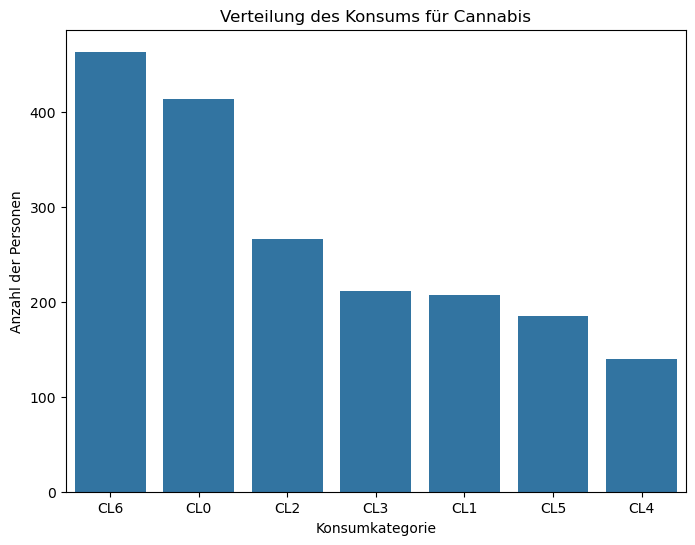

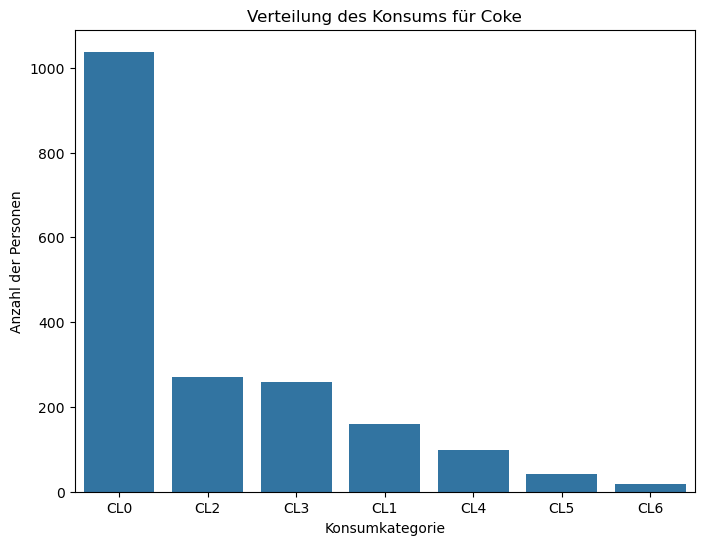

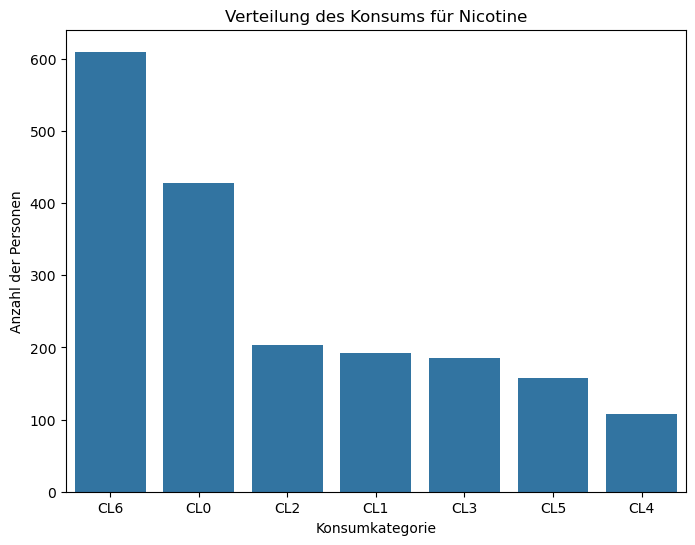

In [9]:
for drug in chosen_drugs:
    plt.figure(figsize=(8, 6))
    
    value_counts = y[drug].value_counts().sort_values(ascending=False)
    
    sns.countplot(x=y[drug], order=value_counts.index)
    
    plt.title(f"Verteilung des Konsums für {drug.capitalize()}")
    plt.xlabel('Konsumkategorie')
    plt.ylabel('Anzahl der Personen')
    plt.show()


### Funktion, die Modelle erstellt und evaluiert

--> Zielvariable für die gewählte Droge

In [23]:
drug_name = "cannabis"
y_selected = y[drug_name]

### Train-Test-Split

--> Splitting zu 80% Trainingsdaten und 20% Testdaten

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_selected, test_size=0.2, random_state=42)

### Verifizieren des Splits

In [12]:
print("\nTrainingsdaten (Features) : ", X_train.shape)
print("Testdaten (Features) : ", X_test.shape)



Trainingsdaten (Features) :  (1508, 12)
Testdaten (Features) :  (377, 12)


## Erstellen und Trainieren verschiedener Modelle
### Random Forest Modell

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


### Logistische Regression Modell


In [14]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

### K-Nearest Neighbors Modell

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

### Ergebnisse für alle Modelle

In [16]:
models = ['Random Forest', 'Logistische Regression', 'K-Nearest Neighbors']
accuracies = [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_knn)
    ]
classification_reports = [
        classification_report(y_test, y_pred_rf, zero_division=0),
        classification_report(y_test, y_pred_logreg, zero_division=0),
        classification_report(y_test, y_pred_knn, zero_division=0)
    ]

### Ausgabe der Genauigkeit und Klassifikationsberichte

In [17]:
for i in range(3):
        print(f"\n{models[i]} - Genauigkeit:", accuracies[i])
        print(f"\n{models[i]} - Klassifikationsbericht:")
        print(classification_reports[i])


Random Forest - Genauigkeit: 0.41379310344827586

Random Forest - Klassifikationsbericht:
              precision    recall  f1-score   support

         CL0       0.54      0.72      0.62        86
         CL1       0.37      0.39      0.38        28
         CL2       0.15      0.09      0.11        55
         CL3       0.35      0.11      0.16        57
         CL4       0.00      0.00      0.00        27
         CL5       0.11      0.03      0.05        32
         CL6       0.42      0.77      0.54        92

    accuracy                           0.41       377
   macro avg       0.28      0.30      0.27       377
weighted avg       0.34      0.41      0.35       377


Logistische Regression - Genauigkeit: 0.41644562334217505

Logistische Regression - Klassifikationsbericht:
              precision    recall  f1-score   support

         CL0       0.49      0.72      0.58        86
         CL1       0.25      0.29      0.27        28
         CL2       0.18      0.11      0

### Vergleich der Genauigkeiten

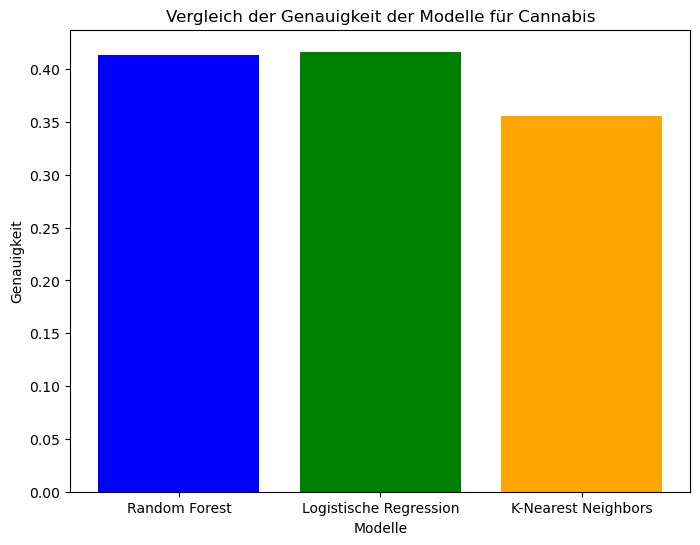

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Modelle')
plt.ylabel('Genauigkeit')
plt.title(f'Vergleich der Genauigkeit der Modelle für {drug_name.capitalize()}')
plt.show()

### Konfusionsmatrix für jedes Modell

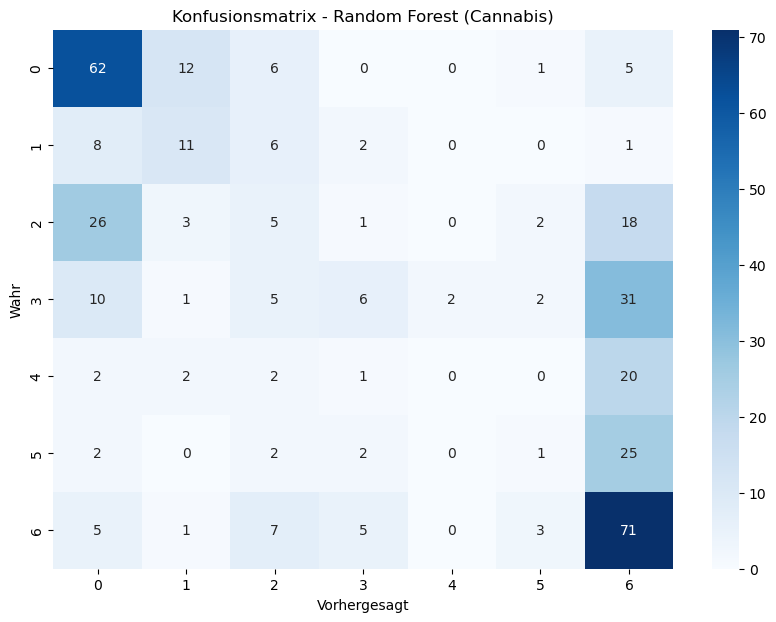

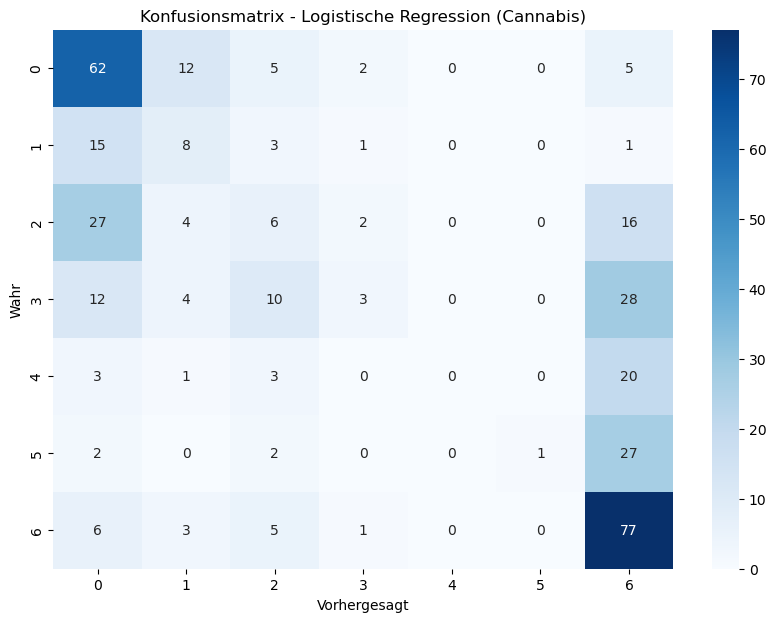

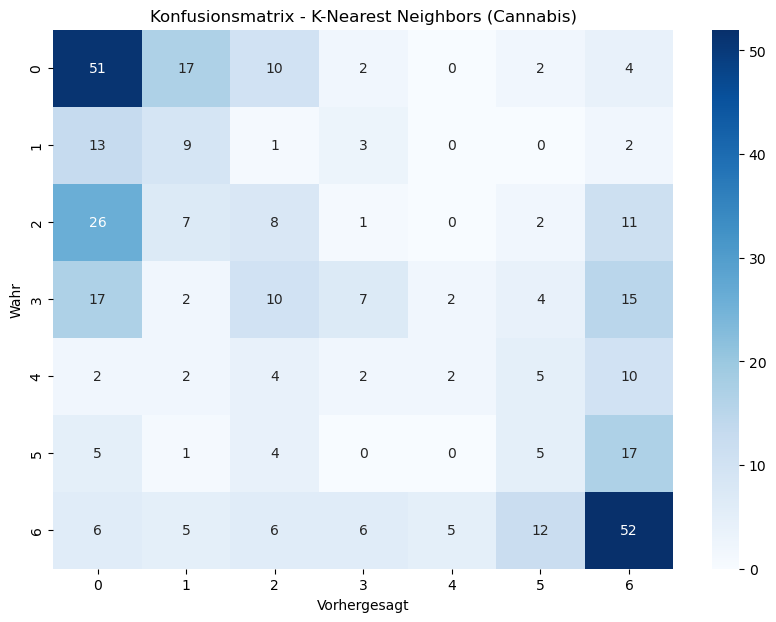

In [19]:
for i in range(3):
        conf_matrix = confusion_matrix(y_test, [y_pred_rf, y_pred_logreg, y_pred_knn][i])
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Konfusionsmatrix - {models[i]} ({drug_name.capitalize()})")
        plt.xlabel("Vorhergesagt")
        plt.ylabel("Wahr")
        plt.show()

### Überprüfung der Klassen in den Vorhersagen

In [20]:
unique_classes = np.unique(y_test)
print("\nVorhergesagte Klassen:", np.unique(y_pred_rf))
print("Echte Klassen:", unique_classes)


Vorhergesagte Klassen: ['CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6']
Echte Klassen: ['CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6']


## Data Preparation

### Überprüfen auf Duplikate

In [21]:
print("Anzahl Duplikate im Datensatz: ", sum(X.duplicated()))

if sum(X.duplicated()) == 0: 
    print("Keine Duplikate im Datensatz.")

Anzahl Duplikate im Datensatz:  0
Keine Duplikate im Datensatz.


### Übersicht zu fehlenden Werten

In [22]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1885 non-null   float64
 1   gender     1885 non-null   float64
 2   education  1885 non-null   float64
 3   country    1885 non-null   float64
 4   ethnicity  1885 non-null   float64
 5   nscore     1885 non-null   float64
 6   escore     1885 non-null   float64
 7   oscore     1885 non-null   float64
 8   ascore     1885 non-null   float64
 9   cscore     1885 non-null   float64
 10  impuslive  1885 non-null   float64
 11  ss         1885 non-null   float64
dtypes: float64(12)
memory usage: 176.8 KB
None


Keine fehlenden oder doppelten Werte im Datensatz vorhanden. Somit müssen keine Einträge gelöscht / entfernt werden.